# 911 Calls 

In this project we will be analyzing some 911 call data from [Kaggle](https://www.kaggle.com/mchirico/montcoalert). The data contains the following fields:

* lat : String variable, Latitude
* lng: String variable, Longitude
* desc: String variable, Description of the Emergency Call
* zip: String variable, Zipcode
* title: String variable, Title
* timeStamp: String variable, YYYY-MM-DD HH:MM:SS
* twp: String variable, Township
* addr: String variable, Address
* e: String variable, Dummy variable (always 1)


## Data and Setup

____
** Import numpy and pandas **

In [1]:
import numpy as np
import pandas as pd

** Import visualization libraries and set %matplotlib inline. **

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

** Read in the csv file as a dataframe called df **

In [3]:
df = pd.read_csv('911.csv')

** Check the info() of the df **

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 326425 entries, 0 to 326424
Data columns (total 9 columns):
lat          326425 non-null float64
lng          326425 non-null float64
desc         326425 non-null object
zip          286835 non-null float64
title        326425 non-null object
timeStamp    326425 non-null object
twp          326310 non-null object
addr         326425 non-null object
e            326425 non-null int64
dtypes: float64(3), int64(1), object(5)
memory usage: 22.4+ MB


** Check the head **

In [5]:
df.head(3)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1


## Basic Questions

** What are the top 5 zipcodes for 911 calls? **

In [6]:
df['zip'].value_counts().head(5)

19401.0    22136
19464.0    21588
19403.0    16488
19446.0    15793
19406.0    10800
Name: zip, dtype: int64

** What are the top 5 townships (twp) for 911 calls? **

In [7]:
df['twp'].value_counts().head(5)

LOWER MERION    28073
ABINGTON        20206
NORRISTOWN      18433
UPPER MERION    17276
CHELTENHAM      15026
Name: twp, dtype: int64

** Take a look at the 'title' column, how many unique title codes are there? **

In [8]:
df['title'].nunique()

133

In [10]:
df['title'].value_counts().head(10)

Traffic: VEHICLE ACCIDENT -    76179
Traffic: DISABLED VEHICLE -    23957
Fire: FIRE ALARM               18436
EMS: RESPIRATORY EMERGENCY     16602
EMS: FALL VICTIM               16438
EMS: CARDIAC EMERGENCY         16100
EMS: VEHICLE ACCIDENT          12976
Traffic: ROAD OBSTRUCTION -    10668
EMS: SUBJECT IN PAIN            9149
EMS: HEAD INJURY                8491
Name: title, dtype: int64

## Feature Engineering

** In the titles column there are "Reasons/Departments" specified before the title code. These are EMS, Fire, and Traffic. We will create a new column called "Reason" that contains this string value.** 

**For example, if the title column value is EMS: BACK PAINS/INJURY , the Reason column value would be EMS. **

In [15]:
df['Reason'] = df['title'].apply(lambda x: x.split(':')[0])

** What is the most common Reason for a 911 call based off of this new column? **

In [16]:
df['Reason'].value_counts()

EMS        161441
Traffic    116065
Fire        48919
Name: Reason, dtype: int64

** Now use seaborn to create a countplot of 911 calls by Reason. **

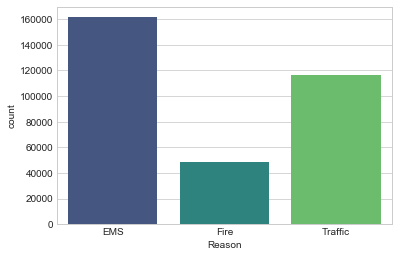

In [21]:
sns.countplot(x='Reason',data=df,palette='viridis',hue_order=True)

___
** Now let us begin to focus on time information. What is the data type of the objects in the timeStamp column? **

In [22]:
type(df['timeStamp'].iloc[0])

str

**  Convert to Datetime **

In [24]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

In [25]:
df['Hour'] = df['timeStamp'].apply(lambda time: time.hour)
df['Month'] = df['timeStamp'].apply(lambda time: time.month)
df['Day of Week'] = df['timeStamp'].apply(lambda time: time.dayofweek)

In [26]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [27]:
df['Day of Week'] = df['Day of Week'].map(dmap)

In [29]:
df.head(3)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,14,12,Thu


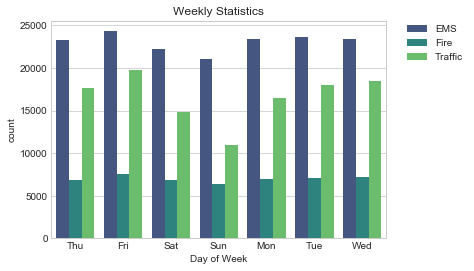

In [31]:
sns.countplot(x='Day of Week',data=df,hue='Reason',palette='viridis')
plt.title('Weekly Statistics')

# To relocate the legend
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

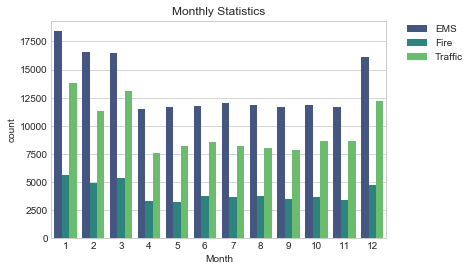

In [32]:
sns.countplot(x='Month',data=df,hue='Reason',palette='viridis')
plt.title('Monthly Statistics')
# To relocate the legend
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [33]:
byMonth = df.groupby('Month').count()
byMonth.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day of Week
Month,,,,,,,,,,,,
1,37824,37824,37824,33480,37824,37824,37812,37824,37824,37824,37824,37824
2,32828,32828,32828,28963,32828,32828,32817,32828,32828,32828,32828,32828
3,34987,34987,34987,31070,34987,34987,34973,34987,34987,34987,34987,34987
4,22343,22343,22343,19671,22343,22343,22336,22343,22343,22343,22343,22343
5,23093,23093,23093,20254,23093,23093,23082,23093,23093,23093,23093,23093


Text(0.5,1,'Monthly 911 calls')

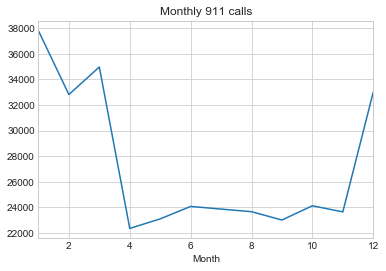

In [35]:
byMonth['twp'].plot()
plt.title('Monthly 911 calls')

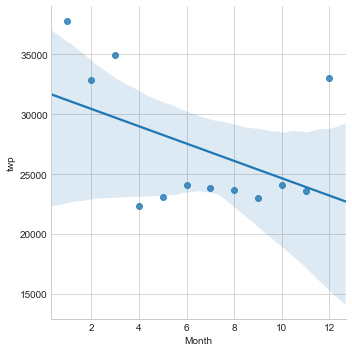

In [36]:
sns.lmplot(x='Month',y='twp',data=byMonth.reset_index())

**Create a new column called 'Date' that contains the date from the timeStamp column. You'll need to use apply along with the .date() method. ** 

In [37]:
df['Date']=df['timeStamp'].apply(lambda t: t.date())

** Now groupby this Date column with the count() aggregate and create a plot of counts of 911 calls.**

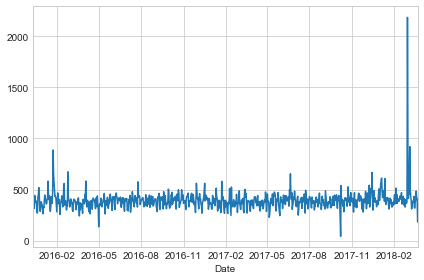

In [38]:
df.groupby('Date').count()['twp'].plot()
plt.tight_layout()

** Now recreate this plot but create 3 separate plots with each plot representing a Reason for the 911 call**

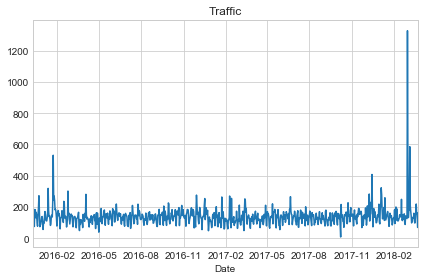

In [39]:
df[df['Reason']=='Traffic'].groupby('Date').count()['twp'].plot()
plt.title('Traffic')
plt.tight_layout()

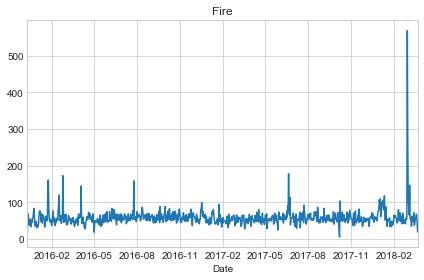

In [40]:
df[df['Reason']=='Fire'].groupby('Date').count()['twp'].plot()
plt.title('Fire')
plt.tight_layout()

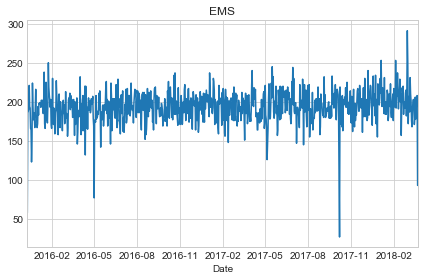

In [41]:
df[df['Reason']=='EMS'].groupby('Date').count()['twp'].plot()
plt.title('EMS')
plt.tight_layout()

____
** Now let's move on to creating  heatmaps with seaborn and our data. We'll first need to restructure the dataframe so that the columns become the Hours and the Index becomes the Day of the Week. There are lots of ways to do this, but I would recommend trying to combine groupby with an [unstack](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.unstack.html) method. Reference the solutions if you get stuck on this!**

In [42]:
dayHour = df.groupby(by=['Day of Week','Hour']).count()['Reason'].unstack()
dayHour.head()

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,
Fri,896,789,701,644,633,786,1286,2087,2487,2570,...,3290,3562,3726,3596,2858,2562,2205,1916,1765,1396
Mon,931,732,663,585,683,862,1291,2175,2714,2766,...,2729,3034,3082,3116,2729,2179,1912,1503,1303,1003
Sat,1130,999,908,767,742,788,957,1295,1674,2132,...,2643,2563,2529,2525,2477,2320,2074,1839,1579,1469
Sun,1159,1026,955,800,717,736,880,1196,1492,1849,...,2276,2170,2200,2234,2179,2067,1753,1536,1235,1177
Thu,871,690,727,603,573,833,1386,2254,2613,2719,...,2863,3044,3017,3335,2707,2226,1974,1724,1360,1120


** Now create a HeatMap using this new DataFrame. **

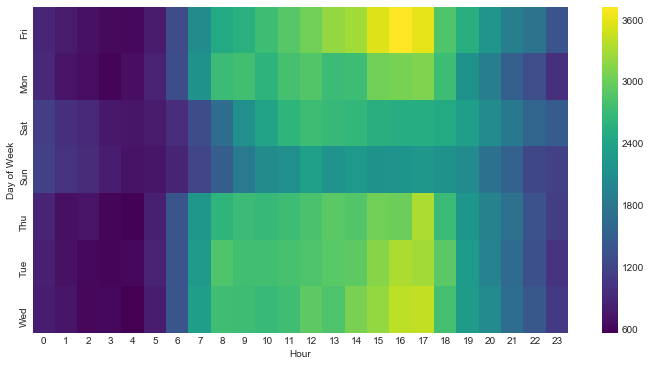

In [43]:
plt.figure(figsize=(12,6))
sns.heatmap(dayHour,cmap='viridis')

** Now create a clustermap using this DataFrame. **

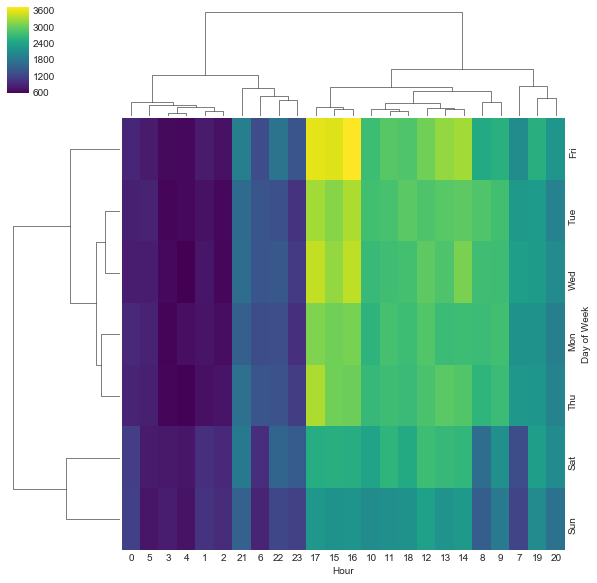

In [44]:
sns.clustermap(dayHour,cmap='viridis')

** Now repeat these same plots and operations, for a DataFrame that shows the Month as the column. **

In [45]:
dayMonth = df.groupby(by=['Day of Week','Month']).count()['Reason'].unstack()
dayMonth.head()

Month,1,2,3,4,5,6,7,8,9,10,11,12
Day of Week,,,,,,,,,,,,
Fri,5532,4848,7005,3574,3278,3747,3736,3297,4226,3433,3377,5570
Mon,5716,5214,4313,3088,3538,3264,3687,3325,3031,4250,3262,4286
Sat,5103,4431,4355,3490,2764,3024,3515,2810,3144,3042,2972,5200
Sun,4882,3806,3268,3026,2580,2679,3259,2658,2565,3172,2592,3896
Thu,4985,4708,5601,3097,3289,4095,3248,3507,3702,3189,3478,4899


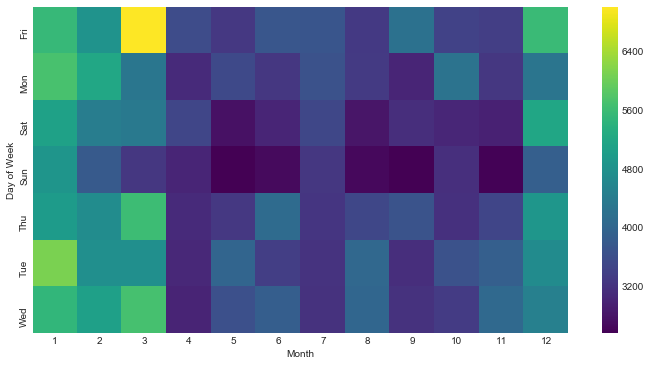

In [46]:
plt.figure(figsize=(12,6))
sns.heatmap(dayMonth,cmap='viridis')

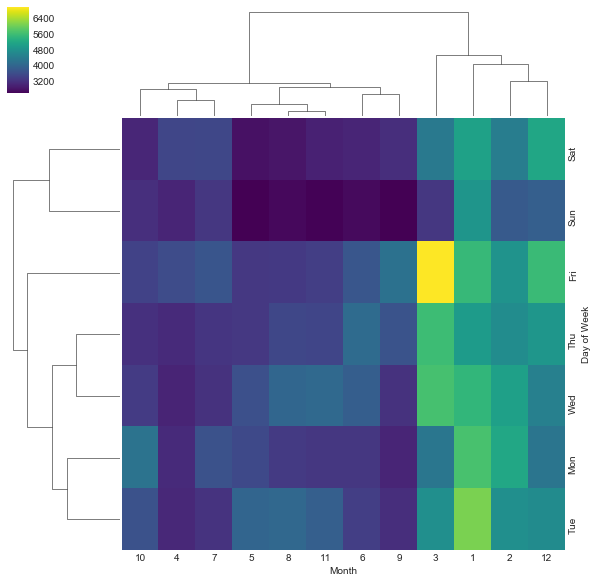

In [47]:
sns.clustermap(dayMonth,cmap='viridis')

**Continue exploring the Data however you see fit!**
# Great Job!